In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')  #Reading the dataset

In [ ]:
df.head()       #Reading the first 5 records of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


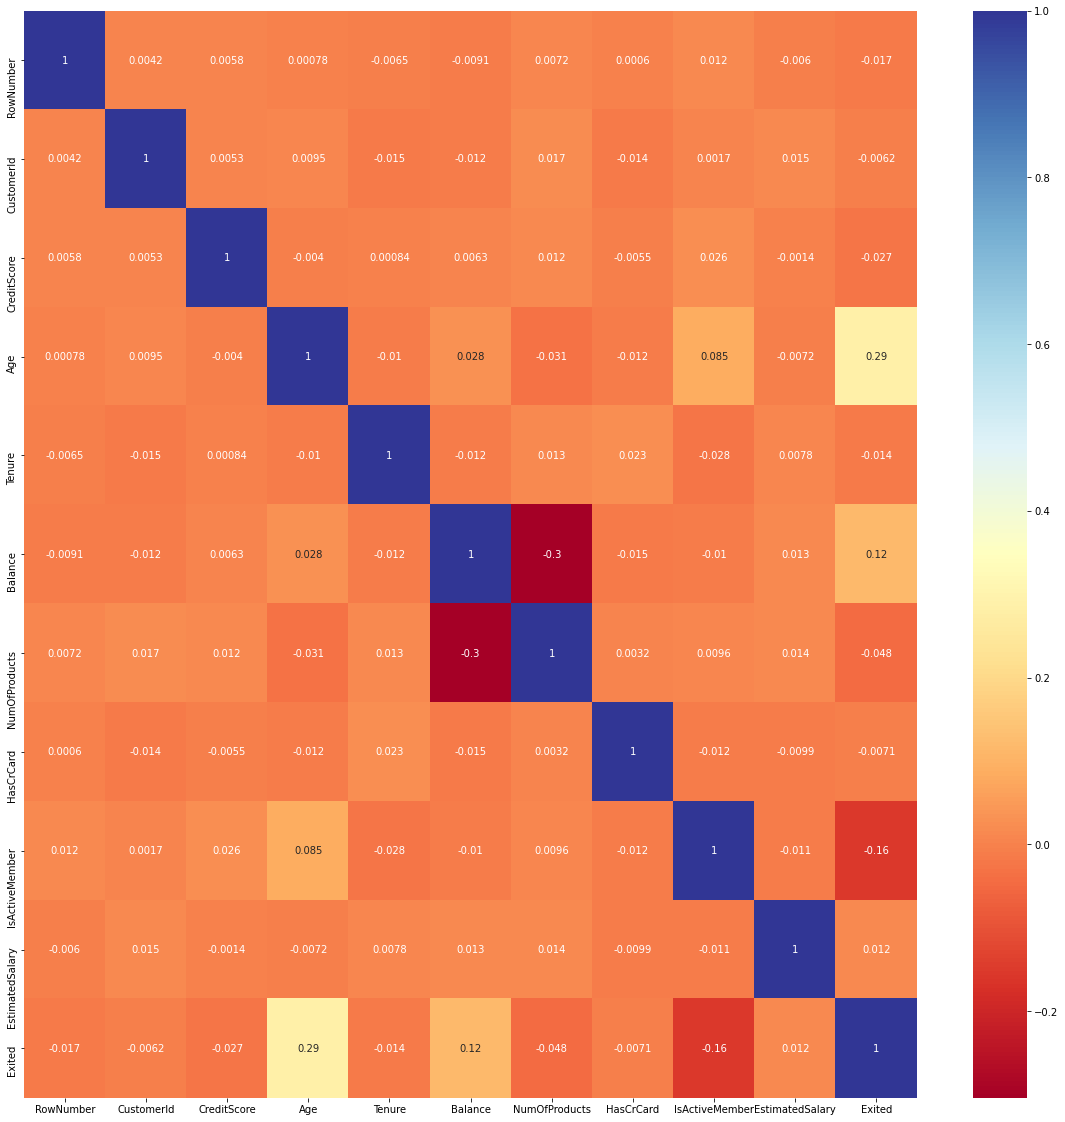

In [ ]:
##Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#Get correlations of each features in dataset
corrmat=df.corr()   
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu")

In [ ]:
X=df.iloc[:,3:13]
Y=df.iloc[:,13]     #Separating the dependent and independent variables

In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True) #Creating dummy variable for categorical variables

In [ ]:
geography.head()  #Viewing the first 5 records of the created dummy variables

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [ ]:
gender=pd.get_dummies(X['Gender'],drop_first=True)  #Creating dummy variable for categorical variables

In [ ]:
gender.head()  #Viewing the first 5 records of the created dummy variables

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
X=X.drop(['Geography','Gender'],axis=1) #Dropping catergorical features from dataset

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)  #Concatinating the created dummy variables into the dataset

In [ ]:
X.head()   #Reading the first 5 records of the dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 16],
 "min_child_weight" : [ 1, 3, 5, 7, 9 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.6 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9]
    
}

In [ ]:
 #Importing required libraries
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost                     

In [ ]:
#Creating a time function
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2))) 

In [ ]:
classifier=xgboost.XGBClassifier()  #Creating a classifier

In [ ]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
start_time = timer(None)
random_search.fit(X,Y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   30.6s finished



 Time taken: 0 hours 0 minutes and 33.12 seconds.


In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
random_search.best_estimator_     #Best parameters for our problem statement

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_     #Best parameters for our problem statement

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 16,
 'min_child_weight': 1}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,      #Implementing the XGBoost classifier
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
from sklearn.model_selection import cross_val_score             #Applying cross validation score
score=cross_val_score(classifier,X,Y,cv=10)

In [ ]:
score

array([0.88 , 0.866, 0.872, 0.873, 0.867, 0.857, 0.862, 0.881, 0.859,
       0.857])

In [ ]:
score.mean()

0.8674

[DATASET](https://drive.google.com/file/d/1KIpwNjpyQP7zmBbMV7V6oJVS6uZ9SOen/view)